# Dataset Information

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.


Variable	Description

Loan_ID	Unique Loan ID

Gender	Male/ Female

Married	Applicant married (Y/N)

Dependents	Number of dependents

Education	Applicant Education (Graduate/ Under Graduate)

Self_Employed	Self employed (Y/N)

ApplicantIncome	Applicant income

CoapplicantIncome	Coapplicant income

LoanAmount	Loan amount in thousands

Loan_Amount_Term	Term of loan in months

Credit_History	credit history meets guidelines

Property_Area	Urban/ Semi Urban/ Rural

Loan_Status	Loan approved (Y/N)

# **Loan Prediction Analysis**

Loan analysis is an evaluation method that determines if loans are made on feasible terms and if potential borrowers can and are willing to pay back the loan.

It checks the eligibility of the potential borrower against the criteria set forth for lending.Loan analysis is an evaluation method that determines if loans are made on feasible terms and if potential borrowers can and are willing to pay back the loan.

It checks the eligibility of the potential borrower against the criteria set forth for lending.

Loan Prediction system is a system which provides you a interface for loan approval to the applicants application of loan. Applicants provides the system about their personal information and according to their information system gives his status of availability of loan.

Creator : Santhanam.D

**Synopsis**

1.Import Modules

2.Loading Dataset

3.Preprocessing the DataSet

4.Exploratory Data Analysis

5.Creation of New Attributes

6.Coorelation Matrix

7.Label Encoding

8.Train-Test Split

9.Model Training

10.Hyperparameter Tuning

11.Confusion Matrix

12.Accuracy Score

**1. Import Modules**

In [58]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Indication on Warning
import warnings
warnings.filterwarnings('ignore')

**2. Loading Dataset**

In [4]:
loan=pd.read_csv('D:\\Data Science\\Data sets\\Loan Prediction Dataset.csv')
print(loan.info())
loan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
l=loan.describe()
l.transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


**3. Preprocessing the DataSet**

In [7]:
# find the null values
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Filling the missing values - for numerical terms - mean
loan['LoanAmount']=loan['LoanAmount'].fillna(loan['LoanAmount'].mean())
loan['Loan_Amount_Term']=loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean())
loan['Credit_History']=loan['Credit_History'].fillna(loan['Credit_History'].mean())

In [9]:
# Filling the missing values - for categorical terms - mode
loan['Gender']=loan['Gender'].fillna(loan['Gender'].mode()[0])
loan['Married']=loan['Married'].fillna(loan['Married'].mode()[0])
loan['Dependents']=loan['Dependents'].fillna(loan['Dependents'].mode()[0])
loan['Self_Employed']=loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])

In [10]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**4. EDA - Exploratory Data Analysis**

In [11]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

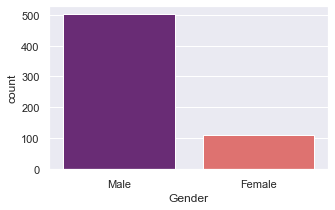

In [15]:
# Categorical attributes visualization
sns.set(rc = {'figure.figsize':(5,3)})
sns.countplot(loan['Gender'],palette='magma')

<AxesSubplot:xlabel='Married', ylabel='count'>

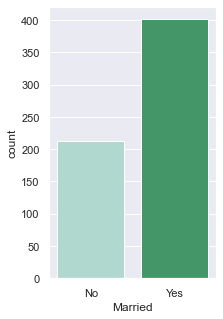

In [22]:
sns.set(rc = {'figure.figsize':(3,5)})
sns.countplot(loan['Married'],palette='BuGn')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

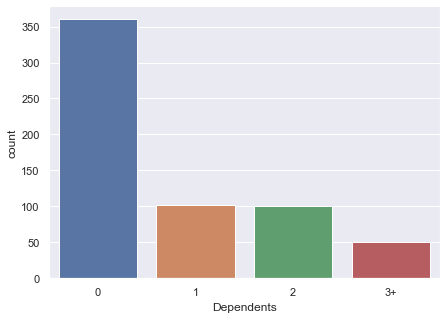

In [23]:
sns.set(rc = {'figure.figsize':(7,5)})
sns.countplot(loan['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

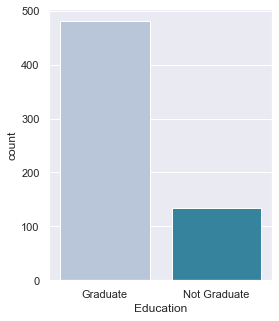

In [26]:
sns.set(rc = {'figure.figsize':(4,5)})
sns.countplot(loan['Education'],palette='PuBuGn')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

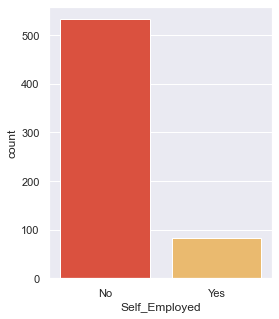

In [27]:
sns.countplot(loan['Self_Employed'],palette='YlOrRd_r')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

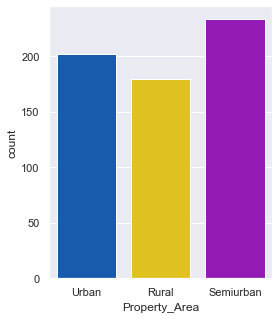

In [28]:
sns.set(rc = {'figure.figsize':(4,5)})
sns.countplot(loan['Property_Area'],palette='prism')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

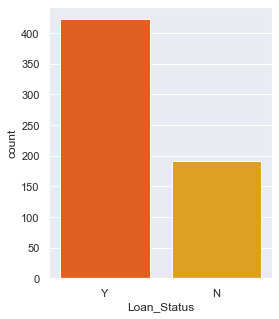

In [29]:
sns.set(rc = {'figure.figsize':(4,5)})
sns.countplot(loan['Loan_Status'],palette='autumn')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

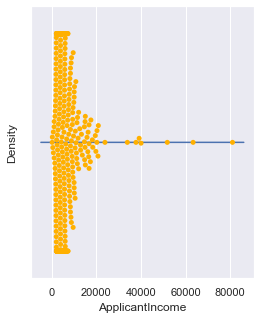

In [30]:
sns.distplot(loan["ApplicantIncome"])
sns.swarmplot(loan["ApplicantIncome"],palette='prism_r')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

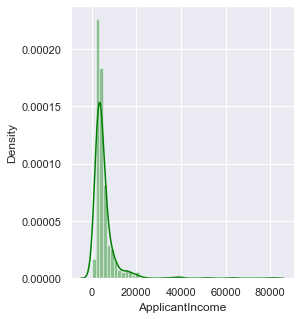

In [38]:
# Numerical attributes visualization
sns.distplot(loan["ApplicantIncome"],color='Green')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

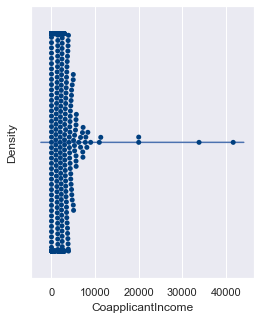

In [40]:
sns.set(rc = {'figure.figsize':(4,5)})
sns.distplot(loan["CoapplicantIncome"])
sns.swarmplot(loan["CoapplicantIncome"],palette='ocean_r')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

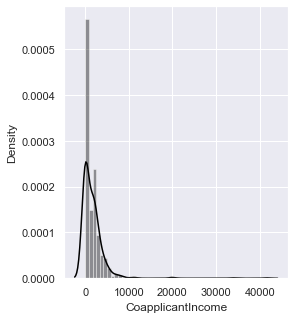

In [44]:
sns.set(rc = {'figure.figsize':(4,5)})
sns.distplot(loan["CoapplicantIncome"],color='Black')

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

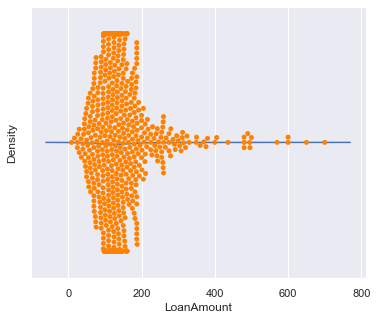

In [48]:
sns.set(rc = {'figure.figsize':(6,5)})
sns.distplot(loan["LoanAmount"])
sns.swarmplot(loan["LoanAmount"],palette='afmhot')

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

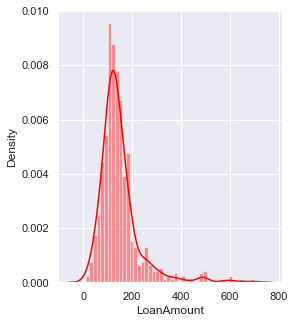

In [49]:
sns.set(rc = {'figure.figsize':(4,5)})
sns.distplot(loan["LoanAmount"],color='Red')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

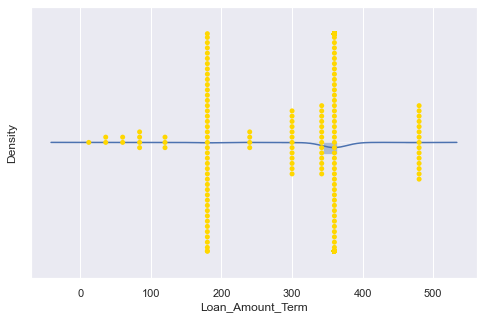

In [51]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.distplot(loan["Loan_Amount_Term"])
sns.swarmplot(loan["Loan_Amount_Term"],palette='prism')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

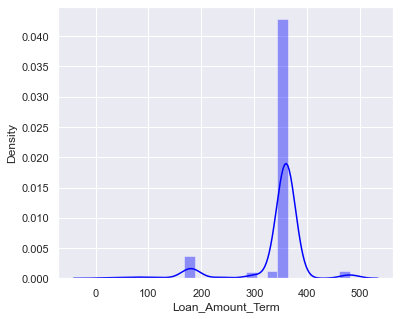

In [54]:
sns.set(rc = {'figure.figsize':(6,5)})
sns.distplot(loan["Loan_Amount_Term"],color='BLUE')

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

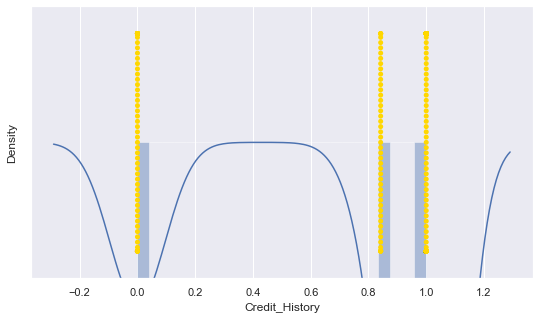

In [55]:
sns.set(rc = {'figure.figsize':(9,5)})
sns.distplot(loan["Credit_History"])
sns.swarmplot(loan["Credit_History"],palette='prism')

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

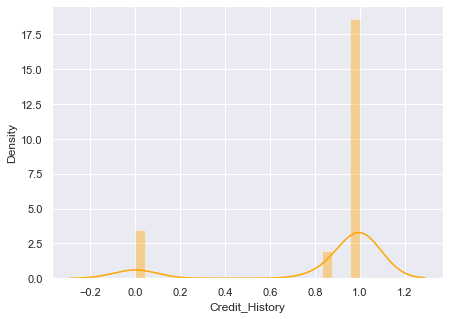

In [56]:
sns.set(rc = {'figure.figsize':(7,5)})
sns.distplot(loan["Credit_History"],color='ORANGE')

**5. Creation of New Attributes**

In [60]:
# Total income
loan['Total_Income']=loan['ApplicantIncome']+loan['CoapplicantIncome']
loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


**5. Log Transformation**

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

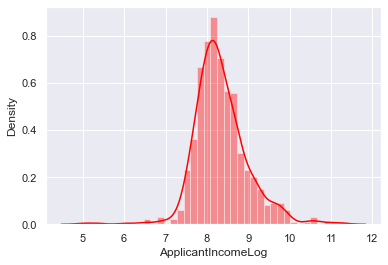

In [63]:
# Applying log transformation to the attribute
loan['ApplicantIncomeLog']=np.log(loan['ApplicantIncome']+1)
sns.distplot(loan['ApplicantIncomeLog'],color='RED')

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

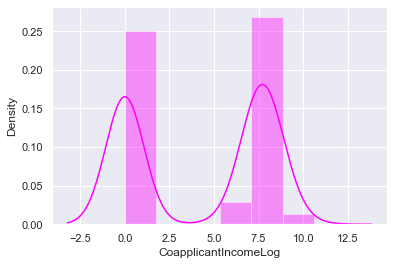

In [64]:
loan['CoapplicantIncomeLog']=np.log(loan['CoapplicantIncome']+1)
sns.distplot(loan['CoapplicantIncomeLog'],color='MAGENTA')

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

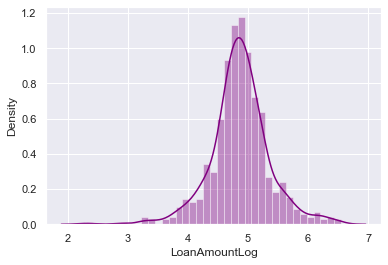

In [67]:
loan['LoanAmountLog'] = np.log(loan['LoanAmount']+1)
sns.distplot(loan["LoanAmountLog"],color='PURPLE')

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

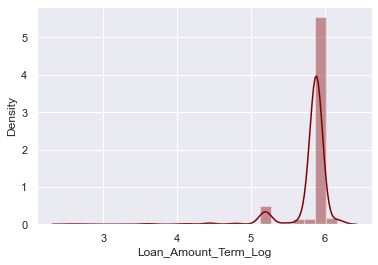

In [70]:
loan['Loan_Amount_Term_Log'] = np.log(loan['Loan_Amount_Term']+1)
sns.distplot(loan["Loan_Amount_Term_Log"],color='MAROON')

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

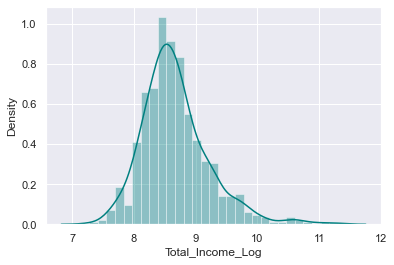

In [71]:
loan['Total_Income_Log'] = np.log(loan['Total_Income']+1)
sns.distplot(loan["Total_Income_Log"],color='TEAL')

**6. Coorelation Matrix**

In [72]:
loan_corr=loan.corr()
loan_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.893037,0.790658,-0.250433,0.436606,-0.024347,0.717856
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.342781,-0.237860,0.573648,0.204492,-0.043119,0.383831
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,0.620102,0.551656,0.047522,0.897671,0.044905,0.687560
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.069830,-0.030741,0.013613,0.085940,0.940881,-0.055321
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.014447,0.019183,0.002384,-0.024909,-0.007773,0.019154
Total_Income,0.893037,0.342781,0.620102,-0.069830,-0.014447,1.000000,0.640090,0.023028,0.505622,-0.042566,0.852901
ApplicantIncomeLog,0.790658,-0.237860,0.551656,-0.030741,0.019183,0.640090,1.000000,-0.368258,0.492560,-0.014723,0.740402
CoapplicantIncomeLog,-0.250433,0.573648,0.047522,0.013613,0.002384,0.023028,-0.368258,1.000000,0.130524,0.012895,0.149070
LoanAmountLog,0.436606,0.204492,0.897671,0.085940,-0.024909,0.505622,0.492560,0.130524,1.000000,0.084301,0.658957
Loan_Amount_Term_Log,-0.024347,-0.043119,0.044905,0.940881,-0.007773,-0.042566,-0.014723,0.012895,0.084301,1.000000,-0.029705


<AxesSubplot:>

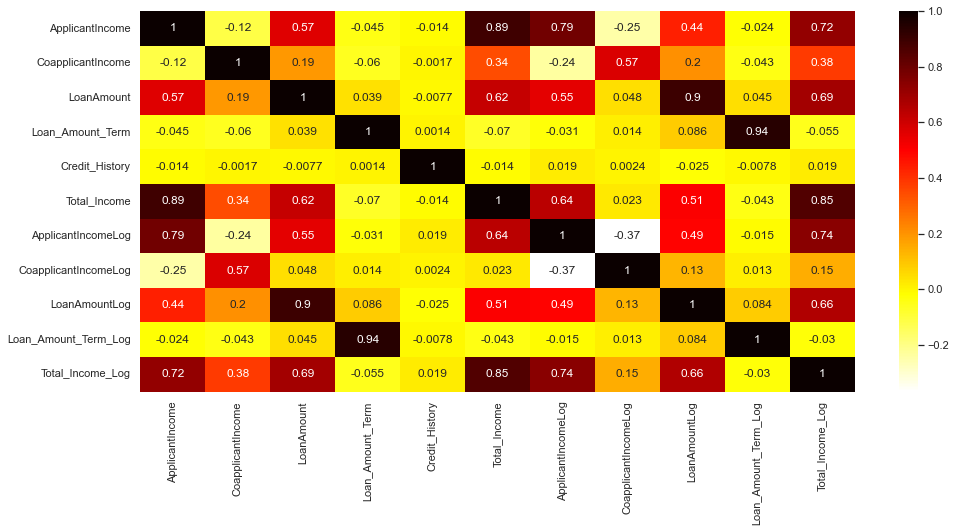

In [82]:
sns.set(rc = {'figure.figsize':(16,7)})
sns.heatmap(loan_corr, annot = True, cmap="hot_r")

<AxesSubplot:>

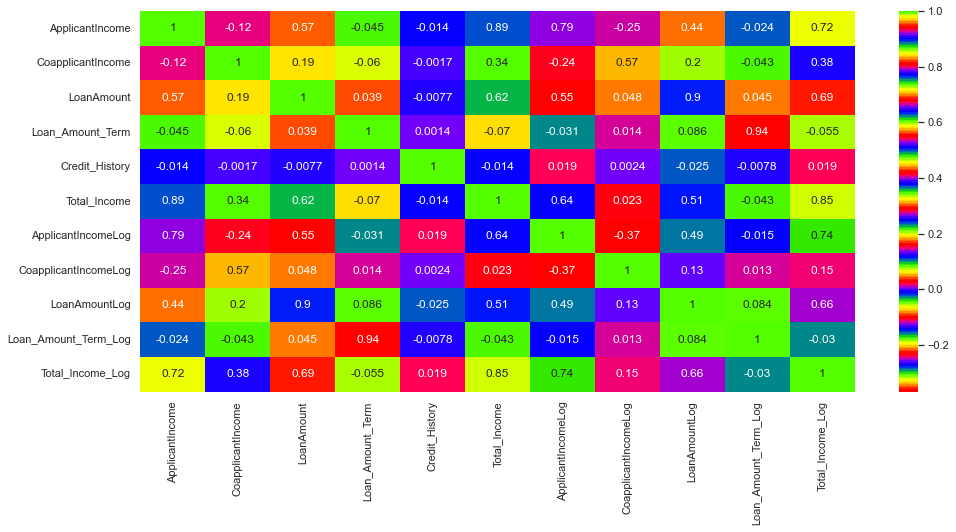

In [83]:
sns.set(rc = {'figure.figsize':(16,7)})
sns.heatmap(loan_corr, annot = True, cmap="prism")

In [84]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


In [85]:
# Drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
loan = loan.drop(columns=cols, axis=1)
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [86]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'ApplicantIncomeLog',
       'LoanAmountLog', 'Loan_Amount_Term_Log', 'Total_Income_Log'],
      dtype='object')

**7. Label Encoding**

In [87]:
from sklearn.preprocessing import LabelEncoder
cols= ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History', 'Property_Area', 'Loan_Status', 'ApplicantIncomeLog','LoanAmountLog', 'Loan_Amount_Term_Log', 'Total_Income_Log']
le=LabelEncoder()
for col in cols:
    loan[col] = le.fit_transform(loan[col])

loan.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,2,2,1,376,100,9,320
1,1,1,1,0,0,2,0,0,306,81,9,333
2,1,1,0,0,1,2,2,1,139,26,9,42
3,1,1,0,1,0,2,2,1,90,73,9,238
4,1,0,0,0,0,2,2,1,381,94,9,327


**8. Train-Test Split**

In [88]:
# Specify input and output attributes
x=loan.drop(columns=['Loan_Status'],axis=1)
y=loan['Loan_Status']

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

**9. Model Training**

**Classify Function**

In [90]:
from sklearn.model_selection import cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
def classify(model,x,y):
    model.fit(x_train,y_train)
    print('Accuracy is',model.score(x_test,y_test)*100)
    #cross validation is used for better validation of model eg: cv-5,train-4,test-1
    score = cross_val_score(model,x,y,cv=5)
    print('Cross Validation is',np.mean(score)*100)

In [91]:
#Logic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model,x,y)

Accuracy is 76.62337662337663
Cross Validation is 79.31627349060376


In [92]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,x,y)

Accuracy is 71.42857142857143
Cross Validation is 71.33946421431428


In [93]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model,x,y)

Accuracy is 77.27272727272727
Cross Validation is 77.69292283086766


In [94]:
#Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model,x,y)

Accuracy is 74.02597402597402
Cross Validation is 77.6915900306544


**10. Hyperparameter Tuning**

In [95]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)
classify(model,x,y)

Accuracy is 77.27272727272727
Cross Validation is 80.78368652538984


**11. Confusion Matrix**

A confusion matrix is a performance measurement technique for Machine learning classification. It is a kind of table which helps you to the know the performance of the classification model on a set of test data for that the true values are known. The term confusion matrix itself is very simple, but its related terminology can be a little confusing. Here, some simple explanation is given for this technique.

**The confusion matrix shows the ways in which your classification model is confused when it makes predictions.**

In [96]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [97]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[26, 28],
       [ 5, 95]], dtype=int64)

<AxesSubplot:>

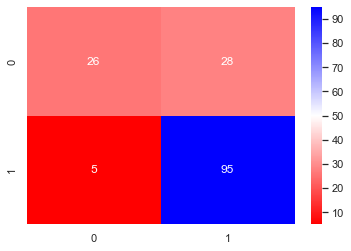

In [106]:
sns.set(rc = {'figure.figsize':(6,4)})
sns.heatmap(cm,annot=True,cmap='bwr_r')

**12. Accuracy Score**

**Accuracy = (TP + TN)/(TP+TN+FP+FN)**

In [107]:
Accuracy = (56+24)/(56+24+16+4)
Accuracy

0.8

In [108]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc_score=accuracy_score(y_test,y_pred)
print(f'Accuracy of the Model: {(acc_score*100)//1} %')

Accuracy of the Model: 78.0 %


**THANK YOU**